In [20]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [15]:
datapath = os.path.expanduser("~/data/courses/bioinfo1/Salmonella_enterica.txt")
with open(datapath, "r") as fid:
    lines = fid.readlines()
meta = lines[0].replace("\n", "")
text = ''.join(lines[1:]).replace('\n', '')

In [17]:
def skew(genome):
    output = [0]
    current_skew = 0
    for (i, char) in enumerate(genome):
        if (char ==  'G'):
            current_skew += 1
        elif (char == 'C'):
            current_skew -= 1
        output.append(current_skew)
    return output

In [21]:
y = skew(text)
x = np.arange(0, len(y))

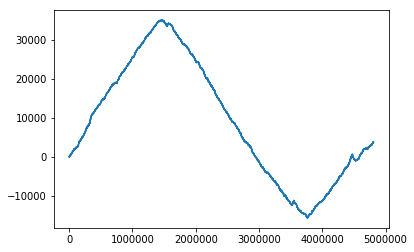

In [22]:
plt.plot(x, y)
plt.show()

In [23]:
def skew_minmax(genome):
    skew_data = np.array(skew(genome))
    arg_min = np.argmin(skew_data)    
    arg_max = np.argmax(skew_data)
    
    skew_min = skew_data[arg_min]
    skew_max = skew_data[arg_max]
    
    arg_min = np.where(skew_data == skew_min)[0]
    arg_max = np.where(skew_data == skew_max)[0]
    
    return {"arg_min": arg_min, "arg_max": arg_max,
            "skew_min": skew_min, "skew_max": skew_max,
            "skew_data": skew_data}

In [26]:
skew_stats = skew_minmax(text)

In [45]:
search_window = 50
arg_min = np.median(skew_stats["arg_min"])

position_min = int(arg_min - search_window)
position_max = int(arg_min + search_window)

In [46]:
reduced_text = text[position_min:position_max]

In [47]:
def hamming_distance(text1, text2):
    
    mismatches = 0
    for (i, char) in enumerate(text1):
        if (text2[i] != char):
            mismatches += 1
    
    return mismatches

def approximate_pattern_count(pattern, text, d):
    text_size = len(text)
    pattern_size = len(pattern)
    N = text_size - pattern_size
    
    count = 0
    
    for i in range(0, N + 1):
        i_p = i + pattern_size
        window = text[i:i_p]
        if (hamming_distance(window, pattern) <= d):
            count += 1
            
    return count

def get_complement(text):
    
    mappings = {ord('A'): 'T', ord('T'): 'A',
                ord('G'): 'C', ord('C'): 'G'}   
    text = text.translate(mappings)[::-1]
    return text

def approximate_frequent_words(text, k, d):
    
    pattern_possibilities = [""]
    nucleis = ["A", "C", "G", "T"]
    for i in range(k):
        iter_list = []
        for pattern in pattern_possibilities:
            for nuclei in nucleis:
                iter_pattern = pattern + nuclei
                iter_list.append(iter_pattern)
        pattern_possibilities.extend(iter_list)
    
    patterns = np.array(pattern_possibilities)
    patterns = np.unique(patterns)
    patterns = [pattern for pattern in patterns if len(pattern) == k]
    
    pattern_dict = {}
    frequent_patterns = []
    max_count = -1
    
    for i, pattern in enumerate(patterns):
        complement = get_complement(pattern)
        count_regular = approximate_pattern_count(pattern, text, d)
        count_complement = approximate_pattern_count(complement, text, d)
        count = count_regular + count_complement
        
        pattern_dict[pattern] = count
        
        if count > max_count:
            frequent_patterns = []
            max_count = count
        
        if count == max_count:
            frequent_patterns.append(pattern)
            
        print("\r{}/{}   ".format(i, len(patterns)), end="")

    return frequent_patterns

In [48]:
approximate_frequent_words(reduced_text, 9, 2)

845/262144   

1632/262144   

2272/262144   

2951/262144   

3735/262144   

4529/262144   

5342/262144   

6150/262144   

6978/262144   

7767/262144   

8549/262144   

9288/262144   

10067/262144   

10685/262144   

11432/262144   

12001/262144   

12697/262144   

13333/262144   

14145/262144   

14772/262144   

15575/262144   

16369/262144   

17179/262144   

17904/262144   

18647/262144   

19040/262144   

KeyboardInterrupt: 